# Cognitive Variability Analysis: Supporting Option 1 Approach

**Goal**: Determine if there's sufficient variability in cognitive performance both *across* and *within* age groups to justify treating cognitive function (rather than age per se) as the primary predictor in our tACS study.

**Key Questions**:
1. What is the age distribution of available participants?
2. Do younger and older adults differ in cognitive performance (variability across groups)?
3. Is there meaningful spread in cognitive function within each age group?
4. How strongly are age and cognitive function correlated? (If r < .7, they capture somewhat distinct variance)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 11

In [6]:
# Load data
df = pd.read_csv('data/RF1SocialRewardProce-FullScoringFinishedS_DATA_LABELS_2025-12-10_1229.csv')

print(f"Total rows in dataset: {len(df)}")
print(f"\nColumns available: {len(df.columns)}")

Total rows in dataset: 429

Columns available: 108


In [8]:
# Identify cognitive measure columns
cog_cols = [
    'Age',
    'HVLT Total Immediate Recall',
    'HVLT Delay Score', 
    'HVLT Retention %',
    'Recognition Discrimination Index',
    'Salthouse Letter Comparison',
    'Salthouse Pattern Comparison',
    'KBIT IQ (age adjusted)',
    'scd_score_total'
]

# Check which columns exist
available_cols = [col for col in cog_cols if col in df.columns]
print("Available cognitive columns:")
for col in available_cols:
    print(f"  - {col}")

Available cognitive columns:
  - Age
  - HVLT Total Immediate Recall
  - HVLT Delay Score
  - HVLT Retention %
  - Recognition Discrimination Index
  - Salthouse Letter Comparison
  - Salthouse Pattern Comparison
  - KBIT IQ (age adjusted)
  - scd_score_total


In [10]:
# Create working dataframe with just the variables we need
cog_df = df[available_cols].copy()

# Convert to numeric (in case of string issues)
for col in cog_df.columns:
    cog_df[col] = pd.to_numeric(cog_df[col], errors='coerce')

# Basic descriptives
print("Basic descriptives (all participants):")
print(cog_df.describe().round(2))

Basic descriptives (all participants):
          Age  HVLT Total Immediate Recall  HVLT Delay Score  \
count  402.00                       420.00            336.00   
mean    45.75                        19.46              8.42   
std     16.87                        10.39              2.49   
min     19.47                         0.00              0.00   
25%     30.96                        16.00              7.00   
50%     44.61                        23.00              9.00   
75%     59.79                        27.00             10.00   
max     89.32                        36.00             12.00   

       HVLT Retention %  Recognition Discrimination Index  \
count            344.00                            420.00   
mean                inf                              8.34   
std                 NaN                              4.13   
min                0.00                              0.00   
25%                7.50                              8.00   
50%               

## 1. Age Distribution

In [13]:
# Filter to participants with valid age data
age_df = cog_df[cog_df['Age'].notna()].copy()
print(f"Participants with valid age data: {len(age_df)}")
print(f"\nAge range: {age_df['Age'].min():.1f} - {age_df['Age'].max():.1f} years")
print(f"Mean age: {age_df['Age'].mean():.1f} (SD = {age_df['Age'].std():.1f})")

Participants with valid age data: 402

Age range: 19.5 - 89.3 years
Mean age: 45.7 (SD = 16.9)


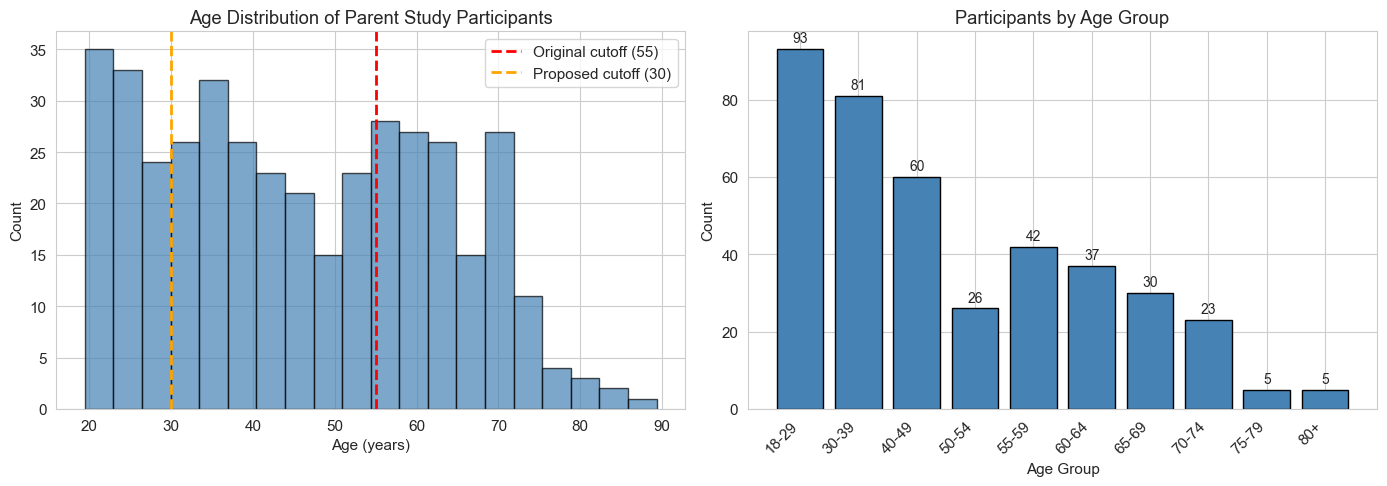


Age group counts:
age_bin
18-29    93
30-39    81
40-49    60
50-54    26
55-59    42
60-64    37
65-69    30
70-74    23
75-79     5
80+       5
Name: count, dtype: int64


In [17]:
# Plot age distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(age_df['Age'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=55, color='red', linestyle='--', linewidth=2, label='Original cutoff (55)')
axes[0].axvline(x=30, color='orange', linestyle='--', linewidth=2, label='Proposed cutoff (30)')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Count')
axes[0].set_title('Age Distribution of Parent Study Participants')
axes[0].legend()

# Count by age bins
age_bins = [18, 30, 40, 50, 55, 60, 65, 70, 75, 80, 100]
age_labels = ['18-29', '30-39', '40-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
age_df['age_bin'] = pd.cut(age_df['Age'], bins=age_bins, labels=age_labels, right=False)
age_counts = age_df['age_bin'].value_counts().sort_index()

bars = axes[1].bar(range(len(age_counts)), age_counts.values, color='steelblue', edgecolor='black')
axes[1].set_xticks(range(len(age_counts)))
axes[1].set_xticklabels(age_counts.index, rotation=45, ha='right')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
axes[1].set_title('Participants by Age Group')

# Add count labels on bars
for bar, count in zip(bars, age_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('data/age_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nAge group counts:")
print(age_counts)

In [19]:
# Recruitment feasibility summary
print("=" * 60)
print("RECRUITMENT FEASIBILITY SUMMARY")
print("=" * 60)

n_55plus = len(age_df[age_df['Age'] >= 55])
n_30plus = len(age_df[age_df['Age'] >= 30])
n_18plus = len(age_df[age_df['Age'] >= 18])

print(f"\nOriginal design (55-80): {n_55plus} potential participants")
print(f"Expanded design (30-80): {n_30plus} potential participants")
print(f"Full adult sample (18+): {n_18plus} potential participants")
print(f"\nExpanding to 30+ would add {n_30plus - n_55plus} participants ({(n_30plus/n_55plus - 1)*100:.0f}% increase)")

RECRUITMENT FEASIBILITY SUMMARY

Original design (55-80): 142 potential participants
Expanded design (30-80): 309 potential participants
Full adult sample (18+): 402 potential participants

Expanding to 30+ would add 167 participants (118% increase)


## 2. Cognitive Performance Across Age Groups

In [22]:
# Create younger vs older adult groups for comparison
# Using 55 as cutoff to match your original design
age_df['age_group'] = pd.cut(age_df['Age'], 
                              bins=[0, 40, 55, 100], 
                              labels=['Younger (<40)', 'Middle (40-54)', 'Older (55+)'])

print("Sample sizes by age group:")
print(age_df['age_group'].value_counts().sort_index())

Sample sizes by age group:
age_group
Younger (<40)     174
Middle (40-54)     86
Older (55+)       142
Name: count, dtype: int64


In [24]:
# Key cognitive measures for analysis
cog_measures = [
    ('HVLT Total Immediate Recall', 'Episodic Memory\n(HVLT Immediate)'),
    ('HVLT Delay Score', 'Episodic Memory\n(HVLT Delay)'),
    ('Salthouse Letter Comparison', 'Processing Speed\n(Letter Comparison)'),
    ('Salthouse Pattern Comparison', 'Processing Speed\n(Pattern Comparison)')
]

# Filter to measures that have sufficient data
valid_measures = [(col, label) for col, label in cog_measures if col in age_df.columns and age_df[col].notna().sum() > 20]
print(f"Cognitive measures with sufficient data: {len(valid_measures)}")
for col, label in valid_measures:
    n_valid = age_df[col].notna().sum()
    print(f"  - {col}: n = {n_valid}")

Cognitive measures with sufficient data: 4
  - HVLT Total Immediate Recall: n = 402
  - HVLT Delay Score: n = 331
  - Salthouse Letter Comparison: n = 333
  - Salthouse Pattern Comparison: n = 333


In [26]:
# Descriptives by age group
print("\nCognitive Performance by Age Group:")
print("=" * 70)

for col, label in valid_measures:
    print(f"\n{col}:")
    group_stats = age_df.groupby('age_group')[col].agg(['count', 'mean', 'std']).round(2)
    print(group_stats)


Cognitive Performance by Age Group:

HVLT Total Immediate Recall:
                count   mean    std
age_group                          
Younger (<40)     174  19.87  11.00
Middle (40-54)     86  21.10   9.37
Older (55+)       142  19.58   9.16

HVLT Delay Score:
                count  mean   std
age_group                        
Younger (<40)     135  9.11  2.13
Middle (40-54)     73  8.25  2.31
Older (55+)       123  7.81  2.74

Salthouse Letter Comparison:
                count   mean   std
age_group                         
Younger (<40)     138  37.33  6.89
Middle (40-54)     75  34.24  7.81
Older (55+)       120  28.56  7.69

Salthouse Pattern Comparison:
                count   mean   std
age_group                         
Younger (<40)     139  47.83  7.70
Middle (40-54)     75  44.63  8.13
Older (55+)       119  38.19  7.40


/var/folders/m6/p7f91dqd37d_mdjnjbx6xdy80000gn/T/ipykernel_14401/2655503100.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = age_df.groupby('age_group')[col].agg(['count', 'mean', 'std']).round(2)
/var/folders/m6/p7f91dqd37d_mdjnjbx6xdy80000gn/T/ipykernel_14401/2655503100.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = age_df.groupby('age_group')[col].agg(['count', 'mean', 'std']).round(2)
/var/folders/m6/p7f91dqd37d_mdjnjbx6xdy80000gn/T/ipykernel_14401/2655503100.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version

/var/folders/m6/p7f91dqd37d_mdjnjbx6xdy80000gn/T/ipykernel_14401/3047840650.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='age_group', y=col, ax=ax, palette='Blues')
/var/folders/m6/p7f91dqd37d_mdjnjbx6xdy80000gn/T/ipykernel_14401/3047840650.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='age_group', y=col, ax=ax, palette='Blues')
/var/folders/m6/p7f91dqd37d_mdjnjbx6xdy80000gn/T/ipykernel_14401/3047840650.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='age_group', y=col, ax=a

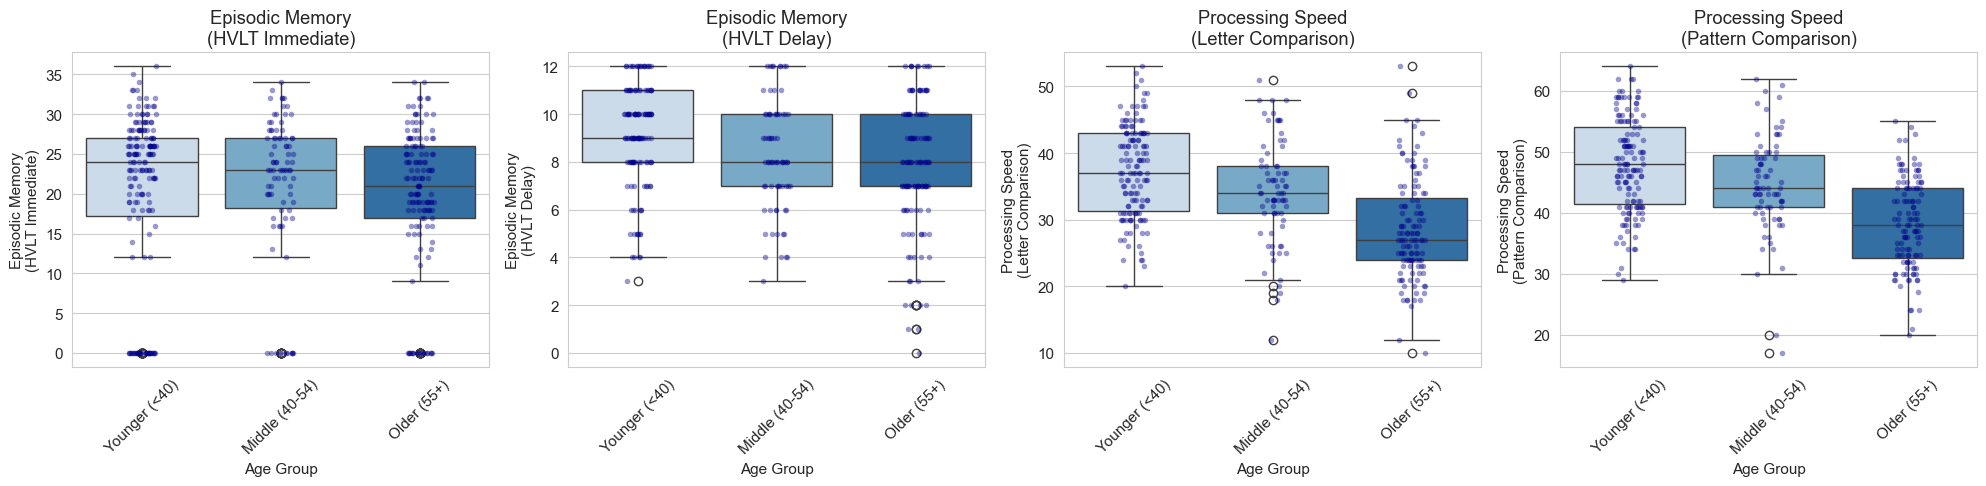

In [28]:
# Visualization: Cognitive performance by age group
if len(valid_measures) > 0:
    n_measures = len(valid_measures)
    fig, axes = plt.subplots(1, n_measures, figsize=(5*n_measures, 5))
    
    if n_measures == 1:
        axes = [axes]
    
    for ax, (col, label) in zip(axes, valid_measures):
        plot_df = age_df[age_df[col].notna()]
        
        sns.boxplot(data=plot_df, x='age_group', y=col, ax=ax, palette='Blues')
        sns.stripplot(data=plot_df, x='age_group', y=col, ax=ax, 
                      color='darkblue', alpha=0.4, size=4)
        
        ax.set_xlabel('Age Group')
        ax.set_ylabel(label)
        ax.set_title(f'{label}')
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('data/cognitive_by_age_group.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("Not enough cognitive data for visualization")

In [30]:
# Statistical tests: Age group differences
print("\nStatistical Tests: Age Group Differences")
print("=" * 70)

for col, label in valid_measures:
    # Get data for each group (excluding NaN)
    groups = []
    group_names = []
    for group_name in ['Younger (<40)', 'Middle (40-54)', 'Older (55+)']:
        group_data = age_df[age_df['age_group'] == group_name][col].dropna()
        if len(group_data) >= 3:  # Need at least 3 for meaningful stats
            groups.append(group_data)
            group_names.append(group_name)
    
    if len(groups) >= 2:
        # One-way ANOVA
        f_stat, p_val = stats.f_oneway(*groups)
        print(f"\n{col}:")
        print(f"  Groups compared: {group_names}")
        print(f"  F = {f_stat:.2f}, p = {p_val:.4f}")
        
        if p_val < 0.05:
            print(f"  → Significant age group differences (supports 'across group' variability)")
        else:
            print(f"  → No significant age group differences")


Statistical Tests: Age Group Differences

HVLT Total Immediate Recall:
  Groups compared: ['Younger (<40)', 'Middle (40-54)', 'Older (55+)']
  F = 0.66, p = 0.5186
  → No significant age group differences

HVLT Delay Score:
  Groups compared: ['Younger (<40)', 'Middle (40-54)', 'Older (55+)']
  F = 9.63, p = 0.0001
  → Significant age group differences (supports 'across group' variability)

Salthouse Letter Comparison:
  Groups compared: ['Younger (<40)', 'Middle (40-54)', 'Older (55+)']
  F = 45.69, p = 0.0000
  → Significant age group differences (supports 'across group' variability)

Salthouse Pattern Comparison:
  Groups compared: ['Younger (<40)', 'Middle (40-54)', 'Older (55+)']
  F = 51.02, p = 0.0000
  → Significant age group differences (supports 'across group' variability)


## 3. Within-Group Variability

In [33]:
# Coefficient of Variation (CV) within each age group
# Higher CV = more relative variability
print("Within-Group Variability (Coefficient of Variation):")
print("=" * 70)
print("Note: CV = SD/Mean * 100. Higher values indicate more variability.")

for col, label in valid_measures:
    print(f"\n{col}:")
    for group in ['Younger (<40)', 'Middle (40-54)', 'Older (55+)']:
        group_data = age_df[age_df['age_group'] == group][col].dropna()
        if len(group_data) > 1 and group_data.mean() != 0:
            cv = (group_data.std() / group_data.mean()) * 100
            print(f"  {group}: CV = {cv:.1f}%, range = {group_data.min():.1f} - {group_data.max():.1f}, n = {len(group_data)}")

Within-Group Variability (Coefficient of Variation):
Note: CV = SD/Mean * 100. Higher values indicate more variability.

HVLT Total Immediate Recall:
  Younger (<40): CV = 55.4%, range = 0.0 - 36.0, n = 174
  Middle (40-54): CV = 44.4%, range = 0.0 - 34.0, n = 86
  Older (55+): CV = 46.8%, range = 0.0 - 34.0, n = 142

HVLT Delay Score:
  Younger (<40): CV = 23.4%, range = 3.0 - 12.0, n = 135
  Middle (40-54): CV = 28.0%, range = 3.0 - 12.0, n = 73
  Older (55+): CV = 35.0%, range = 0.0 - 12.0, n = 123

Salthouse Letter Comparison:
  Younger (<40): CV = 18.5%, range = 20.0 - 53.0, n = 138
  Middle (40-54): CV = 22.8%, range = 12.0 - 51.0, n = 75
  Older (55+): CV = 26.9%, range = 10.0 - 53.0, n = 120

Salthouse Pattern Comparison:
  Younger (<40): CV = 16.1%, range = 29.0 - 64.0, n = 139
  Middle (40-54): CV = 18.2%, range = 17.0 - 62.0, n = 75
  Older (55+): CV = 19.4%, range = 20.0 - 55.0, n = 119


Older adults (55+): n = 142


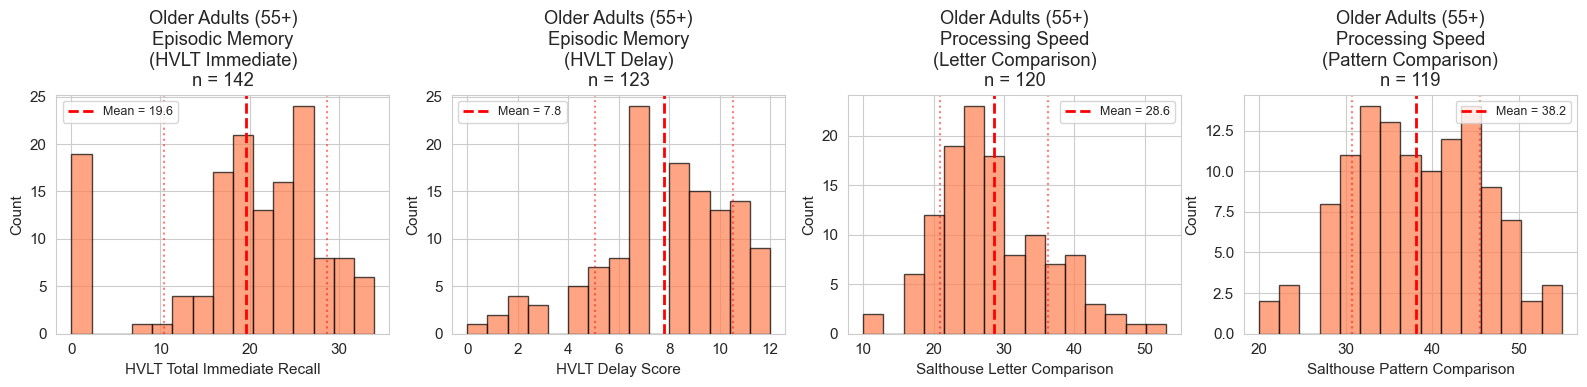

In [35]:
# Visualization: Distribution of cognitive scores within older adults specifically
older_df = age_df[age_df['Age'] >= 55].copy()
print(f"Older adults (55+): n = {len(older_df)}")

if len(older_df) > 0 and len(valid_measures) > 0:
    n_measures = len(valid_measures)
    fig, axes = plt.subplots(1, n_measures, figsize=(4*n_measures, 4))
    
    if n_measures == 1:
        axes = [axes]
    
    for ax, (col, label) in zip(axes, valid_measures):
        data = older_df[col].dropna()
        if len(data) > 0:
            ax.hist(data, bins=15, edgecolor='black', alpha=0.7, color='coral')
            ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {data.mean():.1f}')
            ax.axvline(data.mean() - data.std(), color='red', linestyle=':', alpha=0.5)
            ax.axvline(data.mean() + data.std(), color='red', linestyle=':', alpha=0.5)
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.set_title(f'Older Adults (55+)\n{label}\nn = {len(data)}')
            ax.legend(fontsize=9)
    
    plt.tight_layout()
    plt.savefig('data/within_group_variability.png', dpi=150, bbox_inches='tight')
    plt.show()

## 4. Age-Cognition Correlations

In [38]:
# Correlations between age and cognitive measures
print("Correlations: Age vs. Cognitive Performance")
print("=" * 70)
print("Note: If |r| < 0.7, age and cognition capture somewhat distinct variance")
print("      This would support using cognitive function as a separate predictor\n")

correlation_results = []

for col, label in valid_measures:
    # Get complete cases
    complete_df = age_df[['Age', col]].dropna()
    
    if len(complete_df) > 10:
        r, p = stats.pearsonr(complete_df['Age'], complete_df[col])
        r_squared = r**2
        shared_variance = r_squared * 100
        
        correlation_results.append({
            'Measure': col,
            'n': len(complete_df),
            'r': r,
            'p': p,
            'Shared Variance (%)': shared_variance
        })
        
        print(f"{col}:")
        print(f"  r = {r:.3f}, p = {p:.4f}, n = {len(complete_df)}")
        print(f"  Shared variance: {shared_variance:.1f}%")
        print(f"  Unique variance in cognition: {100 - shared_variance:.1f}%")
        
        if abs(r) < 0.5:
            print(f"  → Weak correlation: Age and cognition capture largely distinct variance")
        elif abs(r) < 0.7:
            print(f"  → Moderate correlation: Some shared variance, but cognition adds unique info")
        else:
            print(f"  → Strong correlation: Age and cognition are highly redundant")
        print()

Correlations: Age vs. Cognitive Performance
Note: If |r| < 0.7, age and cognition capture somewhat distinct variance
      This would support using cognitive function as a separate predictor

HVLT Total Immediate Recall:
  r = -0.043, p = 0.3953, n = 402
  Shared variance: 0.2%
  Unique variance in cognition: 99.8%
  → Weak correlation: Age and cognition capture largely distinct variance

HVLT Delay Score:
  r = -0.256, p = 0.0000, n = 331
  Shared variance: 6.5%
  Unique variance in cognition: 93.5%
  → Weak correlation: Age and cognition capture largely distinct variance

Salthouse Letter Comparison:
  r = -0.507, p = 0.0000, n = 333
  Shared variance: 25.8%
  Unique variance in cognition: 74.2%
  → Moderate correlation: Some shared variance, but cognition adds unique info

Salthouse Pattern Comparison:
  r = -0.497, p = 0.0000, n = 333
  Shared variance: 24.7%
  Unique variance in cognition: 75.3%
  → Weak correlation: Age and cognition capture largely distinct variance



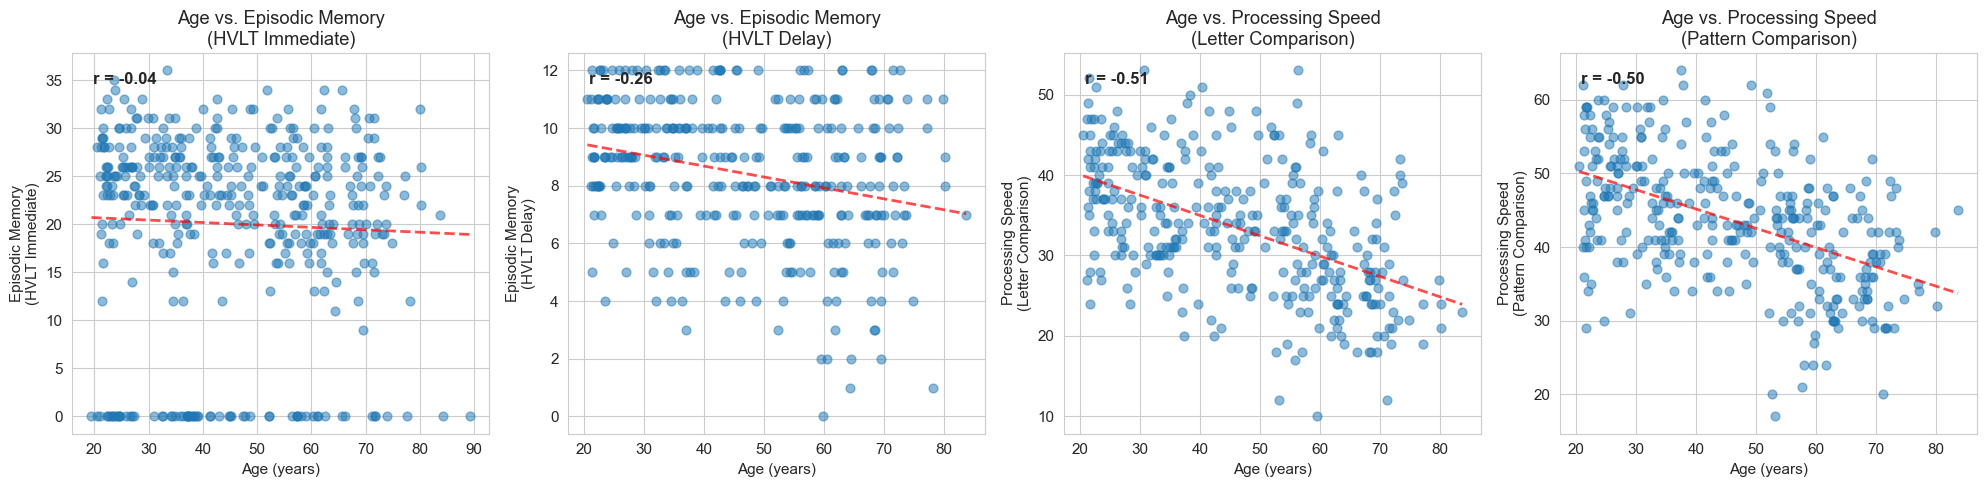

In [42]:
# Scatter plots: Age vs Cognition
if len(valid_measures) > 0:
    n_measures = len(valid_measures)
    fig, axes = plt.subplots(1, n_measures, figsize=(5*n_measures, 5))
    
    if n_measures == 1:
        axes = [axes]
    
    for ax, (col, label) in zip(axes, valid_measures):
        plot_df = age_df[['Age', col]].dropna()
        
        ax.scatter(plot_df['Age'], plot_df[col], alpha=0.5, s=40)
        
        # Add regression line
        if len(plot_df) > 2:
            z = np.polyfit(plot_df['Age'], plot_df[col], 1)
            p = np.poly1d(z)
            x_line = np.linspace(plot_df['Age'].min(), plot_df['Age'].max(), 100)
            ax.plot(x_line, p(x_line), 'r--', linewidth=2, alpha=0.7)
            
            # Add correlation
            r, pval = stats.pearsonr(plot_df['Age'], plot_df[col])
            ax.text(0.05, 0.95, f'r = {r:.2f}', transform=ax.transAxes, 
                    fontsize=12, verticalalignment='top', fontweight='bold')
        
        ax.set_xlabel('Age (years)')
        ax.set_ylabel(label)
        ax.set_title(f'Age vs. {label}')
    
    plt.tight_layout()
    plt.savefig('data/age_cognition_correlations.png', dpi=150, bbox_inches='tight')
    plt.show()

## 5. Summary and Implications for Study Design

In [45]:
print("="*70)
print("SUMMARY: SUPPORT FOR OPTION 1 APPROACH")
print("="*70)

# Check criteria
print("\n1. VARIABILITY ACROSS AGE GROUPS:")
print("   Does cognitive performance differ between younger and older adults?")
# This will be informed by the ANOVA results above

print("\n2. VARIABILITY WITHIN AGE GROUPS:")
print("   Is there meaningful spread in cognitive function within older adults?")
# This will be informed by the CV and distribution plots

print("\n3. AGE-COGNITION INDEPENDENCE:")
print("   Can cognitive function serve as a predictor beyond just age?")
if len(correlation_results) > 0:
    avg_shared_var = np.mean([r['Shared Variance (%)'] for r in correlation_results])
    print(f"   Average shared variance between age and cognition: {avg_shared_var:.1f}%")
    print(f"   Average unique variance in cognition: {100 - avg_shared_var:.1f}%")
    
    if avg_shared_var < 50:
        print("   → SUPPORTED: Cognition captures substantial variance beyond age")
    else:
        print("   → MIXED: Age and cognition share considerable variance")

print("\n4. RECRUITMENT FEASIBILITY:")
print(f"   Original design (55+): n = {n_55plus}")
print(f"   Expanded design (30+): n = {n_30plus}")
print(f"   Gain from expansion: +{n_30plus - n_55plus} participants")

SUMMARY: SUPPORT FOR OPTION 1 APPROACH

1. VARIABILITY ACROSS AGE GROUPS:
   Does cognitive performance differ between younger and older adults?

2. VARIABILITY WITHIN AGE GROUPS:
   Is there meaningful spread in cognitive function within older adults?

3. AGE-COGNITION INDEPENDENCE:
   Can cognitive function serve as a predictor beyond just age?
   Average shared variance between age and cognition: 14.3%
   Average unique variance in cognition: 85.7%
   → SUPPORTED: Cognition captures substantial variance beyond age

4. RECRUITMENT FEASIBILITY:
   Original design (55+): n = 142
   Expanded design (30+): n = 309
   Gain from expansion: +167 participants


In [47]:
# Create a composite cognitive score for future analyses
print("\nBonus: Creating a Cognitive Composite Score")
print("-" * 50)

# Z-score each measure and average (for participants with at least 2 measures)
cog_cols_for_composite = [col for col, _ in valid_measures]

if len(cog_cols_for_composite) >= 2:
    # Z-score each measure
    for col in cog_cols_for_composite:
        col_data = age_df[col]
        age_df[f'{col}_z'] = (col_data - col_data.mean()) / col_data.std()
    
    # Create composite (average of z-scores)
    z_cols = [f'{col}_z' for col in cog_cols_for_composite]
    age_df['cognitive_composite'] = age_df[z_cols].mean(axis=1, skipna=True)
    
    # How many have composite scores?
    n_composite = age_df['cognitive_composite'].notna().sum()
    print(f"Participants with composite cognitive score: {n_composite}")
    
    # Correlation with age
    composite_df = age_df[['Age', 'cognitive_composite']].dropna()
    if len(composite_df) > 10:
        r, p = stats.pearsonr(composite_df['Age'], composite_df['cognitive_composite'])
        print(f"Correlation (Age vs. Cognitive Composite): r = {r:.3f}, p = {p:.4f}")
        print(f"Shared variance: {r**2 * 100:.1f}%")
else:
    print("Not enough cognitive measures for composite score")


Bonus: Creating a Cognitive Composite Score
--------------------------------------------------
Participants with composite cognitive score: 402
Correlation (Age vs. Cognitive Composite): r = -0.258, p = 0.0000
Shared variance: 6.7%
